### Importing Our Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import tkinter as tk
from tkinter import messagebox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

parkinsons_data = pd.read_csv('DataSet/parkinsons.data')

In [2]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Data Preprocessing

In [3]:
# Cleaning the 'name' column
parkinsons_data['name'] = parkinsons_data['name'].apply(lambda x: re.sub(r'\D', '', x))

# Convert the 'name' column to numeric type
parkinsons_data['name'] = pd.to_numeric(parkinsons_data['name'])

In [4]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,1011,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1012,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,1013,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,1014,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,1015,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# Checking the shape of the dataset
print("\nShape of the dataset:", parkinsons_data.shape)


Shape of the dataset: (195, 24)


In [6]:
# Getting more information about the dataset
print("\nDataset Information:")
parkinsons_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    int64  
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 

In [7]:
# Getting some statistical measures about the data
print("\nStatistical Summary:")
parkinsons_data.describe()


Statistical Summary:


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,1241.656410,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,140.650257,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,1011.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,1131.500000,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,1241.000000,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,1348.500000,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,1506.000000,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# Distribution of target Variable
print("\nDistribution of 'status' variable:")
print(parkinsons_data['status'].value_counts())


Distribution of 'status' variable:
status
1    147
0     48
Name: count, dtype: int64


### EDA & Data Visualisation 

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_79330/2384452175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=parkinsons_data, palette="Set2")


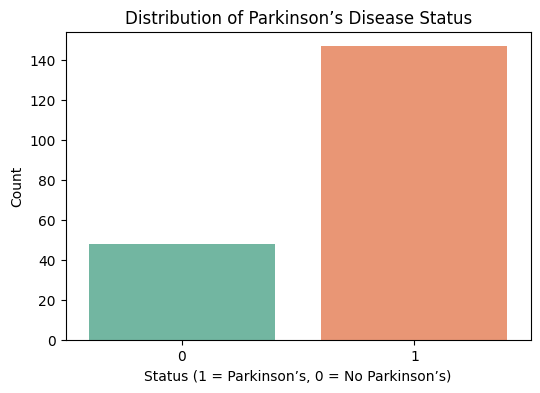

In [9]:
# Visualizing the distribution of the target variable (Parkinson's Status)
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=parkinsons_data, palette="Set2")
plt.title('Distribution of Parkinson’s Disease Status')
plt.xlabel('Status (1 = Parkinson’s, 0 = No Parkinson’s)')
plt.ylabel('Count')
plt.show()

#### Insight: The dataset is imbalanced, with more patients diagnosed with Parkinson's disease (status = 1) than those without it (status = 0).

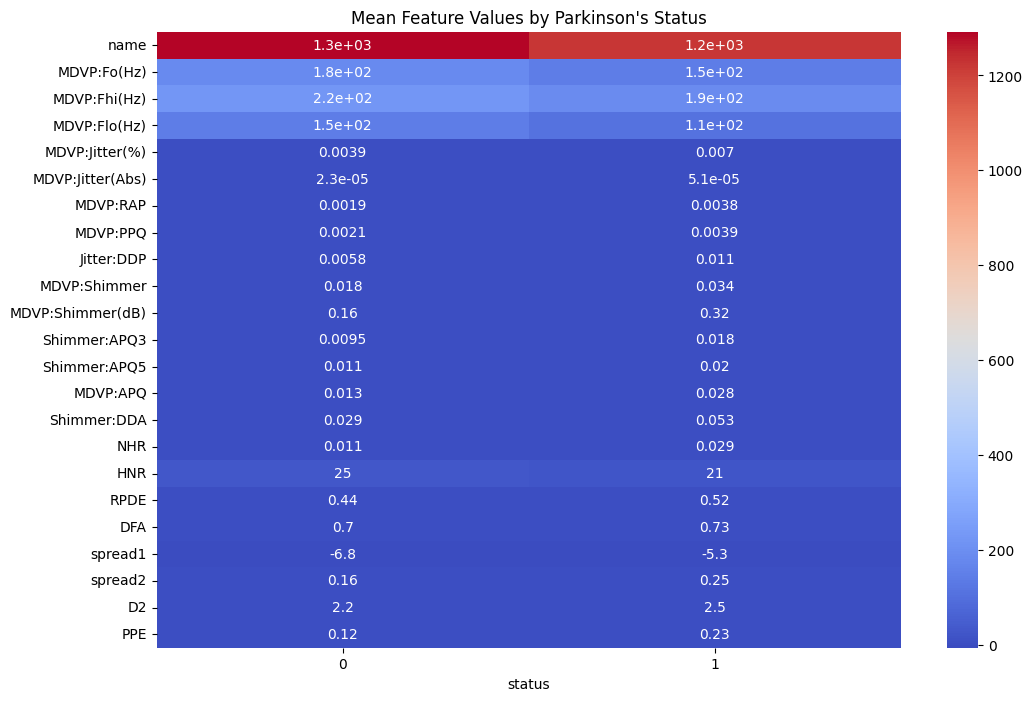

In [10]:
# Grouping the data based on the target variable and visualizing the mean values
grouped_data = parkinsons_data.groupby('status').mean()
# Visualizing the mean values of features by status using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data.T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mean Feature Values by Parkinson\'s Status')
plt.show()


### Insight from the Heatmap:
### The heatmap above shows the mean values of various features for both Parkinson's patients (status = 1) and non-Parkinson's patients (status = 0).

### 1. Distinctive Differences: Several features, such as MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), and PPE, show noticeable differences in mean values between the two groups. This suggests that these features could be significant indicators in differentiating Parkinson's from non-Parkinson's individuals.

### 2. Higher Jitter and Shimmer Values: Parkinson's patients tend to have higher jitter and shimmer values, indicating more voice irregularities, which are characteristic of the disease.

### 3. Lower HNR Values: Harmonic-to-noise ratio (HNR) is lower in Parkinson's patients, suggesting that their voices have more noise relative to harmonic components, which can be another distinguishing factor.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_79330/518075567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=parkinsons_data, palette="Set3")


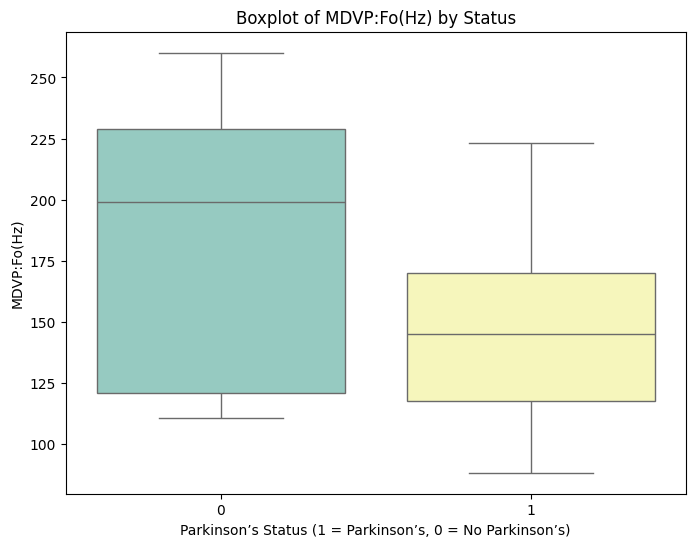

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=parkinsons_data, palette="Set3")
plt.title('Boxplot of MDVP:Fo(Hz) by Status')
plt.xlabel('Parkinson’s Status (1 = Parkinson’s, 0 = No Parkinson’s)')
plt.ylabel('MDVP:Fo(Hz)')
plt.show()

### Insight: Parkinson’s patients tend to have lower values of fundamental frequency, indicating a possible connection between vocal frequency and the disease.

### Model Training

In [12]:
# Preparing the data for training
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Feature scaling
scaler = StandardScaler()

# Fitting the scaler with the training data
scaler.fit(X_train)

# Transforming the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Building the SVM model
model = svm.SVC(kernel='linear')

# Training the model with the training data
model.fit(X_train, Y_train)

# Model Evaluation
# Predicting on the test data
Y_pred = model.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nAccuracy of the model: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy of the model: 87.18%

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



### Finding the best parameters for the model

In [13]:
# Setting up the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Setting up the GridSearchCV
grid_search = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', cv=5)

# Fitting the GridSearchCV
grid_search.fit(X_train, Y_train)

# Getting the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Model Evaluation
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nBest Parameters: {best_params}")
print(f"\nAccuracy of the tuned SVM model: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))




Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Accuracy of the tuned SVM model: 92.31%

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.90      0.95        31

    accuracy                           0.92        39
   macro avg       0.86      0.95      0.90        39
weighted avg       0.94      0.92      0.93        39



### Trying to solve the Imbalanced data by Oversampling

In [14]:
# Preparing the data for training
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

# Applying SMOTE to oversample the minority class
smote = SMOTE(random_state=2)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Feature scaling
scaler = StandardScaler()

# Fitting the scaler with the training data
scaler.fit(X_train)

# Transforming the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Building the SVM model
model = svm.SVC( C=100, gamma=0.1, kernel='rbf')

# Training the model with the training data
model.fit(X_train, Y_train)

# Model Evaluation
# Predicting on the test data
Y_pred = model.predict(X_test)

# Perform k-fold cross-validation (k=5)
k = 5
cross_val_scores = cross_val_score(model, X_train, Y_train, cv=k)

# Calculate mean and standard deviation of cross-validation scores
cv_mean = cross_val_scores.mean()
cv_std = cross_val_scores.std()

# Calculating the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nAccuracy of the model: {accuracy * 100:.2f}%")
print(f"Mean Cross-Validation Score (k=5): {cv_mean * 100:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {cv_std:.4f}")
print(f"Scores per Fold: {cross_val_scores}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy of the model: 92.31%
Mean Cross-Validation Score (k=5): 96.61%
Standard Deviation of Cross-Validation Scores: 0.0216
Scores per Fold: [0.95833333 0.93617021 0.9787234  0.95744681 1.        ]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
# Function to predict Parkinson's disease
def predict_parkinsons():
    input_data = [float(entry.get()) for entry in entry_fields]
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    std_data = scaler.transform(input_data_reshaped)
    prediction = model.predict(std_data)
    if prediction[0] == 0:
        messagebox.showinfo("Prediction", "The Person doesn't have Parkinson's Disease")
    else:
        messagebox.showinfo("Prediction", "The Person have Parkinson's Disease")

# GUI
root = tk.Tk()
root.title("Parkinson's Disease Prediction")

# Labels
labels = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

entry_fields = []
for i, label in enumerate(labels):
    tk.Label(root, text=label).grid(row=i, column=0)
    entry = tk.Entry(root)
    entry.grid(row=i, column=1)
    entry_fields.append(entry)

# Predict Button
predict_button = tk.Button(root, text="Predict", command=predict_parkinsons)
predict_button.grid(row=len(labels)+1, columnspan=2)

root.mainloop()

2024-12-08 21:31:56.502 Python[79330:1298777] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-08 21:31:56.503 Python[79330:1298777] +[IMKInputSession subclass]: chose IMKInputSession_Modern
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
